[![gammapy](https://img.shields.io/badge/powered%20by-gammapy-orange.svg?style=flat)](https://gammapy.org/)

# 🤖 Gammapy analysis workflow and package structure

[![Gammapy](https://docs.gammapy.org/0.20.1/_images/gammapy_banner.png)](https://gammapy.org/)

Gammapy is an open-source Python package for gamma-ray astronomy built on [Numpy](https://numpy.org/), [Scipy](https://scipy.org/) and [Astropy](https://www.astropy.org/).

<a id='indice'></a>
### Indice
[Analysis workflow](#workflow)<br>
[Step 1.0:  Analysis steps](#step1)<br>
$\;\;\;\;\;$[Step 1.1: Data access and selection (DL3)](#step1.1)<br>
$\;\;\;\;\;\;\;\;\;\;$[Step 1.1.1: Getting started with data](#step1.1.1)<br>
$\;\;\;\;\;\;\;\;\;\;$[Step 1.1.2: The index tables](#step1.1.2)<br>
$\;\;\;\;\;\;\;\;\;\;$[Step 1.1.3: Working with event lists](#step1.1.3)<br>
[Step 1.0: Data Extraction](#step1)<br>
$\;\;\;\;\;$[Step 1.1: Downloading the Data](#step1.1)<br>
$\;\;\;\;\;$[Step 1.2: Loading the DataFrame](#step1.2)<br>
$\;\;\;\;\;$[Step 1.3: DataFrame Display](#step1.3)<br>
[Step 2.0: Data Preparation](#step2)<br>
$\;\;\;\;\;$[Step 2.1: DataFrame Description](#step2.1)<br>
$\;\;\;\;\;$[Step 2.2: Quantifying Cardinality](#step2.2)<br>
$\;\;\;\;\;$[Step 2.3: Removing Duplicates](#step2.3)<br>
$\;\;\;\;\;$[Step 2.4: Removing Irrelevant Data](#step2.4)<br>
$\;\;\;\;\;$[Step 2.5: Fixing Structural Errors](#step2.5)<br>
$\;\;\;\;\;$[Step 2.6: Detecting Outliers](#step2.6)<br>
$\;\;\;\;\;$[Step 2.7: Handling Missing Data](#step2.7)<br>
$\;\;\;\;\;$[Step 2.8: One Hot Encoding](#step2.8)<br>
[Step 3.0: Data Exploration/Visualization](#step3)<br>
$\;\;\;\;\;$[Step 3.1: Descriptive Statistics](#step3.1)<br> 
$\;\;\;\;\;$[Step 3.2: Feature Selection ](#step3.2)<br> 
$\;\;\;\;\;\;\;\;\;\;$[Step 3.2.1: Univariate Selction](#step3.2.1)<br> 
$\;\;\;\;\;\;\;\;\;\;$[Step 3.2.2: Feature Importance](#step3.2.2)<br> 
$\;\;\;\;\;$[Step 3.3: Features Correlation](#step3.3)<br> 
[Step 4.0: Predictive Modeling](#step4)<br>
[Step 5.0: Model Validation](#step5)<br>
[Deployment of the Solution](#deployment)<br>
[Acknowledgements](#acknowledgements)

<a id='workflow'></a>
## Analysis Workflow

The figure below illustrates the standard analysis workflow and the corresponding structure of Gammapy's subpackages. Gammapy can typically be used with the configuration-based high-level analysis API or as a standard Python library by importing the functionality of subpackages. The different data levels and data reduction steps and their mapping to the Gammapy API are explained in more detail below.


<img src="data-flow-gammapy.png" width=700 height=200 />
Fig 1: Data flow and sub-package structure of Gammapy. The folder icons represent the corresponding sub-packages. The direction of the the data flow is illustrated with shaded arrows. The top section shows the data levels as defined by CTA.


🔝 [Back to Top](#indice)<br>

___

<a id='step1'></a>
## Step 1.0:  Analysis steps

<a id='step1.1'></a>
### Step 1.1: [Data access and selection (DL3)](https://docs.gammapy.org/1.0/user-guide/dl3.html#data)

The analysis of gamma-ray data with Gammapy starts at the “data level 3”. At this level the data is stored as lists of gamma-like events and the corresponding instrument response functions (IRFs).

<a id='step1.1.1'></a>
### Step 1.1.1: Getting started with data

In [11]:
# EventList class to load IACT gamma-ray event lists:
from gammapy.data import EventList
filename = '$GAMMAPY_DATA/hess-dl3-dr1/data/hess_dl3_dr1_obs_id_023523.fits.gz'
events = EventList.read(filename)

In [12]:
# DataStoreto load the events for observation ID 23523:
from gammapy.data import DataStore
data_store = DataStore.from_dir('$GAMMAPY_DATA/hess-dl3-dr1')
events = data_store.obs(23523).events # leading zeros in decimal integer literals are not permitted!

<a id='step1.1.2'></a>
### Step 1.1.2: The index tables

A typical way to organize the files relevant to the data we are interested in are the index tables. There are two tables:

* Observation index table: this table collects the information on each observation or run, with meta data about each of them, such as the pointing direction, the duration, the run ID…

* HDU index table: this table provides, for each observation listed in the index table, the location of the corresponding data and instrument response files.

A DataStore can then be created by providing each of these two tables in the same file with `from_file()`, or instead by the directory where they can be found with `from_dir()` as shown above.

<a id='step1.1.3'></a>
### Step 1.1.3: Working with event lists

To take a quick look at the events inside the list, one can use `peek()`

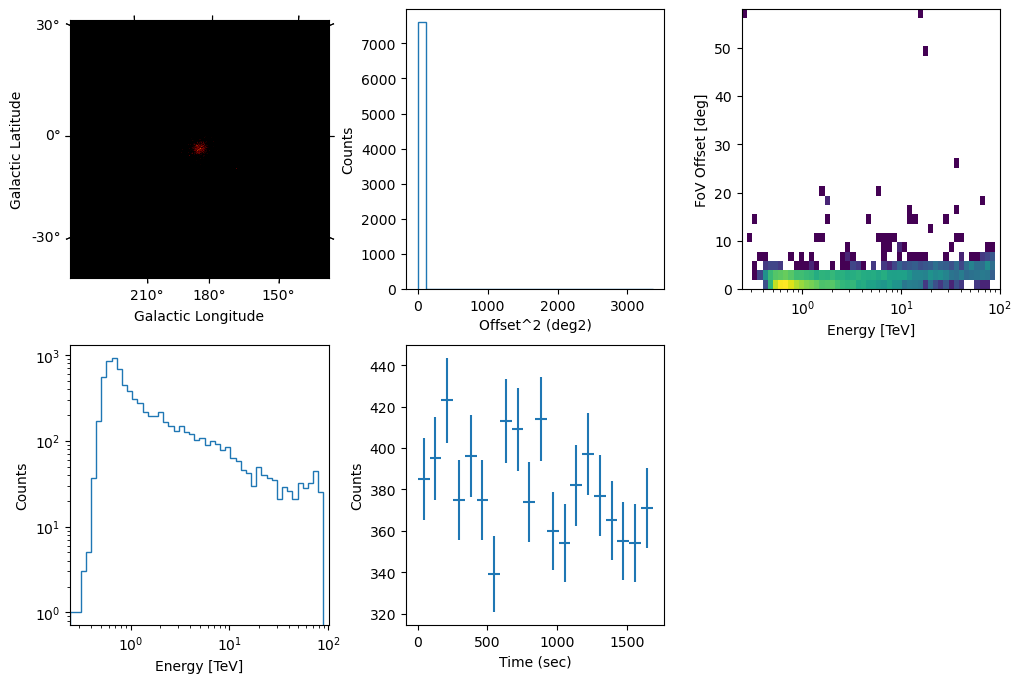

In [13]:
from gammapy.data import EventList
filename = '$GAMMAPY_DATA/hess-dl3-dr1/data/hess_dl3_dr1_obs_id_023523.fits.gz'
events = EventList.read(filename)
events.peek()

Events can be selected based on any of their properties, with dedicated functions existing for energy, time, offset from pointing position and the selection of events in a particular region of the sky.

In [15]:
import astropy.units as u
from astropy.time import Time
from gammapy.data import EventList
filename = '$GAMMAPY_DATA/hess-dl3-dr1/data/hess_dl3_dr1_obs_id_023523.fits.gz'
events = EventList.read(filename)

In [24]:
# Select events based on energy
selected_energy = events.select_energy([1*u.TeV, 1.2*u.TeV])
selected_energy.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
5407363826567,123890830.25761104,82.28364,21.345219,1.1545221
5420248727650,123890843.09696221,81.99309,22.53259,1.0192306
5420248727960,123890844.55593276,85.75385,21.530905,1.1561962
5420248728165,123890845.466331,83.71307,22.21706,1.1002396
5424543694983,123890847.21869731,81.30836,21.989603,1.1220458
5424543695439,123890849.3513372,82.78702,21.76855,1.1998897
...,...,...,...,...
7164005450675,123892481.44804645,85.28534,21.328024,1.1117512


In [29]:
# Select events based on time
t_start = Time(57185, format='mjd')
t_stop = Time(57185.5, format='mjd')

selected_time = events.select_time([t_start, t_stop])
selected_time.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32


In [32]:
# Select events based on offset
selected_offset = events.select_offset([1*u.deg, 2*u.deg])
selected_offset.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
5407363825970,123890827.79615426,81.93147,20.79867,0.69548655
5407363826128,123890828.52555823,83.40073,19.771587,1.6680022
5407363826414,123890829.61423635,84.70039,20.08733,2.1429496
5407363826446,123890829.75004911,82.30209,20.510132,0.702869
5407363826567,123890830.25761104,82.28364,21.345219,1.1545221
5407363826656,123890830.61403751,83.58668,20.127363,0.6688179
...,...,...,...,...
7198365188207,123892510.24479365,84.97216,19.973597,2.0567915


In [33]:
# Select events from a region in the sky
selected_region =  events.select_region("icrs;circle(86.3,22.01,3)")
selected_region.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
5407363825684,123890826.66805482,84.97964,23.89347,10.352011
5407363825695,123890826.69749284,84.54751,21.004095,4.0246882
5407363825831,123890827.23673964,85.39696,19.41868,2.2048872
5407363826067,123890828.26131463,85.98302,21.053099,0.86911184
5407363826095,123890828.41393518,86.97305,21.837437,4.1240892
5407363826383,123890829.53362775,83.18322,22.008213,0.7920148
...,...,...,...,...
7198365188207,123892510.24479365,84.97216,19.973597,2.0567915


In [34]:
# Finally one can select events based on any other of the columns of the `EventList.table`
selected_id = events.select_parameter('EVENT_ID', (5407363826067,5407363826070))
selected_id.table

EVENT_ID,TIME,RA,DEC,ENERGY
,s,deg,deg,TeV
int64,float64,float32,float32,float32
5407363826067,123890828.26131463,85.98302,21.053099,0.86911184


To finish

🔝 [Back to Top](#indice)<br>

___

<a id='step1'></a>
## Step 1.0:  Data Extraction

https://docs.gammapy.org/1.0/_images/data-flow-gammapy.png

<a id='step1.1'></a>
### Step 1.1: Downloading the Data

Text

<a id='step1.2'></a>
### Step 1.2: Loading the DataFrame

Text

<a id='step1.3'></a>
### Step 1.3: DataFrame Display

Text

🔝 [Back to Top](#indice)<br>

___

<a id='step2'></a>
## Step 2.0: Data Preparation

Text

<a id='step2.1'></a>
### Step 2.1: Data Description

Text

<a id='step2.2'></a>
### Step 2.2: Quantifying Cardinality 

Text

<a id='step2.3'></a>
### Step 2.3: Removing Duplicates

Text

<a id='step2.4'></a>
### Step 2.4: Removing Irrelevant Data 

Text

<a id='step2.5'></a>
### Step 2.5: Fixing Structural Errors

Text

<a id='step2.6'></a>
### Step 2.6: Detecting Outliers

Text

<a id='step2.7'></a>
### Step 2.7: Handling Missing Data

Text

<a id='step2.8'></a>
### Step 2.8: One Hot Encoding

Text

🔝 [Back to Top](#indice)<br>

___

<a id='step3'></a>
## Step 3.0: Data Exploration/Visualization

Text

<a id='step3.1'></a>
### Step 3.1: Descriptive Statistics 

Text

<a id='step3.2'></a>
### Step 3.2: Feature Selection 

Text

<a id='step3.2.1'></a>
#### Step 3.2.1: Univariate Selction

Text

<a id='step3.2.2'></a>
#### Step 3.2.2: Feature Importance

Text

<a id='step3.3'></a>
### Step 3.3: Features Correlation

Text

🔝 [Back to Top](#indice)<br>

___

<a id='step4'></a>
## Step 4.0: Predictive Modeling

Text

___

🔝 [Back to Top](#indice)<br>

___

<a id='step5'></a>
## Step 5.0: Model Validation


Text

🔝 [Back to Top](#indice)<br>

___

<a id='deployment'></a>
## Deployment of the Solution 


text

<a id='acknowledgements'></a>
## Acknowledgements

Text

🔝 [Back to Top](#indice)<br>